One of the most popular economic reports comes out the first Friday of every month. It is call the Employment Situation Summary, but it is also referred to as the **Friday Jobs Report** by the financial media. I'm going to use the Python *pandas* data analysis library and *pandas-datareader* library to retrieve the latest employment numbers.

The first step is to simply import those two libraries. I'm also going to import the *datetime* library to use some dates to determine the start and end points for the data I'm going to download.

In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime

I'm going to set the end point to today and the start point to just before the financial crisis in 2008.

In [2]:
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime.today()

The *pandas-datareader* library makes it easy to get data into *pandas*. One of the easy to use sources of data included in *pandas-datareader* is the St. Louis Federal Reserve [FRED](https://fred.stlouisfed.org/) database website. Just search there for the data you need and then note the series code for the data you want. I want to get the All Employees: Total Nonfarm Payrolls series so the code is PAYEMS. This series provides a monthly estimate of total employment that is reported in thousands of persons. The code to get that data is below.

In [3]:
df_employed = pdr.DataReader('PAYEMS', 'fred', start, end)
df_employed.tail(5)

PAYEMS
DATE              
2018-10-01  149852
2018-11-01  150048
2018-12-01  150275
2019-01-01  150586
2019-02-01  150606

You can see that in February there were 150,606,000 employed. That was up from 150,586,000 in January. However, what we really want to see is the change in the number of jobs since the previous month. I can do that with the following pandas code.

In [4]:
df_employed['change'] = df_employed['PAYEMS'] - df_employed['PAYEMS'].shift(1)
df_employed.tail(5)

PAYEMS  change
DATE                      
2018-10-01  149852   277.0
2018-11-01  150048   196.0
2018-12-01  150275   227.0
2019-01-01  150586   311.0
2019-02-01  150606    20.0

In [5]:
print('{:+,} jobs created last month.'.format(int(df_employed['change'][-1] * 1000)))

+20,000 jobs created last month.


If you want to compare the number of jobs added this past month to what happened a year a go, you can calculate the percent change over the past 12-months using the *pandas* pct_change function.

In [6]:
df_employed['pct_change'] = (df_employed['PAYEMS'].pct_change(periods=12, fill_method='bfill') * 100).round(1)
df_employed['pct_change'].tail(5)

DATE
2018-10-01    1.8
2018-11-01    1.8
2018-12-01    1.8
2019-01-01    1.9
2019-02-01    1.7
Name: pct_change, dtype: float64

I looks like jobs were up 1.7% this February versus the number of jobs in February of 2018.  The graph below plots the trend in job growth year-over-year since 2007. You can clearly see the impacts of the 2008 recession in the data.

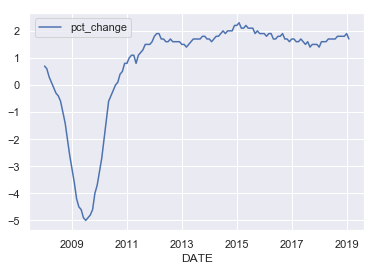

In [7]:
import seaborn as sns
sns.set()
%matplotlib inline
df_employed.plot(y='pct_change')

Another popular component of the **Employment Situation Summary** is the Civilian Unemployment Rate. You can get that data using the UNRATE series on FRED.

In [8]:
df_unemployment = pdr.DataReader('UNRATE', 'fred', start, end)
df_unemployment = df_unemployment.rename(columns={'UNRATE': 'Unemployment Rate'})
df_unemployment.tail(5)

Unemployment Rate
DATE                         
2018-10-01                3.8
2018-11-01                3.7
2018-12-01                3.9
2019-01-01                4.0
2019-02-01                3.8

In [9]:
print('The unemployment rate last month was {:}%.'.format(df_unemployment['Unemployment Rate'][-1]))

The unemployment rate last month was 3.8%.


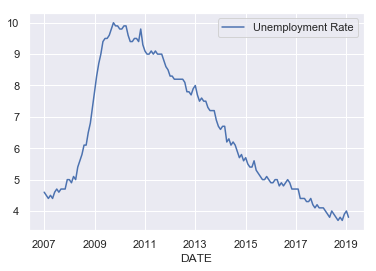

In [10]:
df_unemployment.plot(y='Unemployment Rate')

In the chart above, you can clearly see the impact of the 2008 recession in the unemployment rate. Also note that the unemployment rate is below the 2007 rate at this point.

In [11]:
df_unemployment['change'] = df_unemployment['Unemployment Rate'] - df_unemployment['Unemployment Rate'].shift(1)
df_unemployment.tail(5)

Unemployment Rate  change
DATE                                 
2018-10-01                3.8     0.1
2018-11-01                3.7    -0.1
2018-12-01                3.9     0.2
2019-01-01                4.0     0.1
2019-02-01                3.8    -0.2

In [12]:
print('The unemployment rate changed by {:.1f}% last month as compared to the previous month.'.format(df_unemployment['change'][-1]))

The unemployment rate changed by -0.2% last month as compared to the previous month.


There are several other components of the Friday Jobs Report that I haven't covered yet. I hope to revisit this post next month to include the labor force participation rate and average hourly earnings. I might even make these graphs interactive using Plotly. Feel free to suggest any other enhancements in the comments section below.